In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys
import easygui

import json


from nptdms import TdmsFile as TF

import importlib

import mhdpy.load as load
import mhdpy.analysis as analysis

mpl.rcParams.update({'font.size': 14})

datafolder = "C:\\Users\\aspit\\OneDrive\\Data\\"

In [9]:
# filepaths_PL = easygui.fileopenbox(multiple=True,default = datafolder)
filepaths_PL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_2Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_4Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_8Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_64Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_128Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_12kV_256Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_2Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_4Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_8Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_16Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_32Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_64Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_128Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_13kV_256Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_2Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_4Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_8Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_16Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_32Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_64Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_128Hz.spe','C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_14kV_256Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_2Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_4Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_8Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_16Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_32Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_64Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_128Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\PIMAX_1_60C_15kV_256Hz.spe']
# filepaths_pow = easygui.fileopenbox(multiple=True,default = datafolder)

#filepath_EL = easygui.fileopenbox(multiple=True,default = datafolder)
filepath_EL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Eventlog.json']
with open(filepath_EL[0]) as read_file:
    eventlog = json.load(read_file)

dfs_PL = load.common.create_tcdict(filepaths_PL,load.spe.spe2df_spect,prefix = 'PIMAX_1_')
# dfs_pow = load.common.create_tcdict(filepaths_pow,load.common.tdms2df,prefix = 'Log_Powermeter_2_')

regexs = {'Temperature' : '(.+?)C_', 'Reprate': '_(\d+)Hz' , 'Power': '_(\d+)kV'}

dfs_PL = load.common.tcdict2mi(dfs_PL, regexs)
# dfs_pow = load.common.tcdict2mi(dfs_pow, regexs)

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


In [10]:
dfs_PL

0
Temperature Reprate Power                                                   
60.0        2.0     12.0                    0       1       2       3    ...
            4.0     12.0                    0       1       2       3    ...
            8.0     12.0                   0       1      2       3      ...
            64.0    12.0                   0      1      2      3      4
...
            128.0   12.0                   0      1      2      3      4
...
            256.0   12.0                   0      1      2      3      4
...
            2.0     13.0                    0       1       2       3    ...
            4.0     13.0                    0       1       2       3    ...
            8.0     13.0                   0      1       2       3      ...
            16.0    13.0                   0       1      2      3       ...
            32.0    13.0                   0       1      2      3      4...
            64.0    13.0                   0      1      2      3      4
...
            128.0   13.0                   0      1      2      3      4
...
            256.0   13.0                   0      1      2      3      4
...
            2.0     14.0                    0       1       2       3    ...
            4.0     14.0                    0       1       2       3    ...
            8.0     14.0                   0      1      2       3       ...
            16.0    14.0                   0      1       2      3      4...
            32.0    14.0                   0      1      2      3      4
...
            64.0    14.0                   0      1      2      3      4
...
            128.0   14.0                   0      1      2      3      4
...
            256.0   14.0                   0      1      2      3      4
...
            2.0     15.0                    0       1       2       3    ...
            4.0     15.0                    0       1       2       3    ...
            8.0     15.0                   0       1      2       3      ...
            16.0    15.0                   0      1      2      3      4
...
            32.0    15.0                   0      1      2      3      4
...
            64.0    15.0                   0      1      2      3      4
...
            128.0   15.0                   0      1      2      3      4
...
            256.0   15.0                   0      1      2      3      4
...

In [3]:
dfs_PL_cut = dfs_PL.copy()
for testcase in dfs_PL.index:
    dfin = dfs_PL.loc[testcase][0]
    dfout = analysis.trpl.cutspectraldf(dfin, 778,798)
    dfs_PL_cut.loc[testcase][0] = dfout

# dfs_PL_cut

TypeError: 'AxesSubplot' object does not support indexing

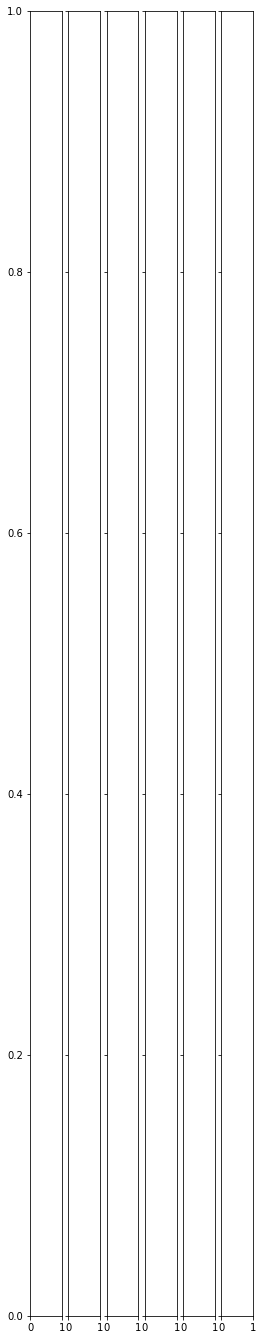

In [4]:
mindex = dfs_PL_cut.index
xgraphs = len(mindex.levels[0])
ygraphs = len(mindex.levels[1])
fig, axes = plt.subplots(xgraphs,ygraphs,sharey = True, figsize = (xgraphs*4,ygraphs*4))


i=0
for idx in dfs_PL_cut.index:   
    ax = axes[np.mod(i,xgraphs)][np.mod(int(i/xgraphs),ygraphs)]
    ax.plot(dfs_PL_cut.loc[idx][0].index,dfs_PL_cut.loc[idx][0])
    ax.set_title(idx)
    ax.legend(dfs_PL_cut.loc[idx][0].columns)
    i=i+1
    
fig.suptitle(mindex.names)

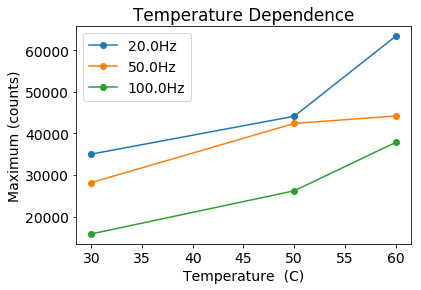

In [114]:
maximums = dfs_PL_cut.copy()
for filename in dfs_PL_cut.index:
    maximums.loc[filename][0] = dfs_PL_cut.loc[filename][0].max()[0]
    
maximums = maximums.swaplevel(0,1).sort_index()

for reprate in maximums.index.levels[0]:
    plt.plot(maximums.loc[reprate],marker = 'o', label = str(reprate) + "Hz")
    plt.title('Temperature Dependence')
    plt.xlabel('Temperature  (C)')
    plt.ylabel('Maximum (counts)')
plt.legend()

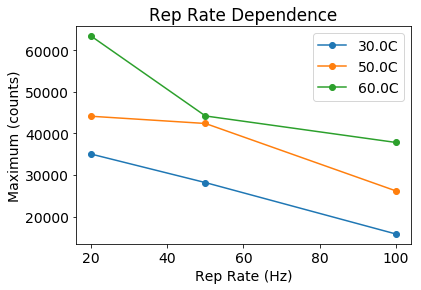

In [115]:
maximums = dfs_PL_cut.copy()
for filename in dfs_PL_cut.index:
    maximums.loc[filename][0] = dfs_PL_cut.loc[filename][0].max()[0]
    
# maximums = maximums.swaplevel(0,1).sort_index()

lns = []
for temp in maximums.index.levels[0]:
    plt.plot(maximums.loc[temp],marker = 'o', label = str(temp) + "C")
    plt.title('Rep Rate Dependence')
    plt.xlabel('Rep Rate (Hz)')
    plt.ylabel('Maximum (counts)')
plt.legend()

[30. 50. 60. 70.]


10000

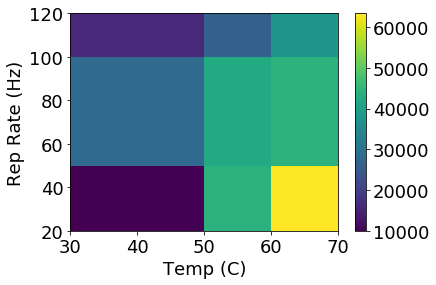

In [93]:
# import plotly

df = maximums.unstack()[0]

x = df.columns.values
y = df.index.values

x = np.append(x,70)
y = np.append(y,120)
print(x)

X,Y = np.meshgrid(x,y)

data = df.values.tolist()

data[0][0] = 10000


fig, ax = plt.subplots(1)

plot = ax.pcolormesh(x,y,data)
ax.set_xlabel('Temp (C)')
ax.set_ylabel('Rep Rate (Hz)')
plt.colorbar(plot)
# ax.set_xlim([30,70])
# img = plt.pcolormesh(data)
#plt.axis([0,120,0,100])


data[0][0]
# data = [plotly.graph_objs.Heatmap( z=df.values.tolist(), colorscale='Viridis')]

# plotly.plotly.iplot(data, filename = 'pandas_heatmap')


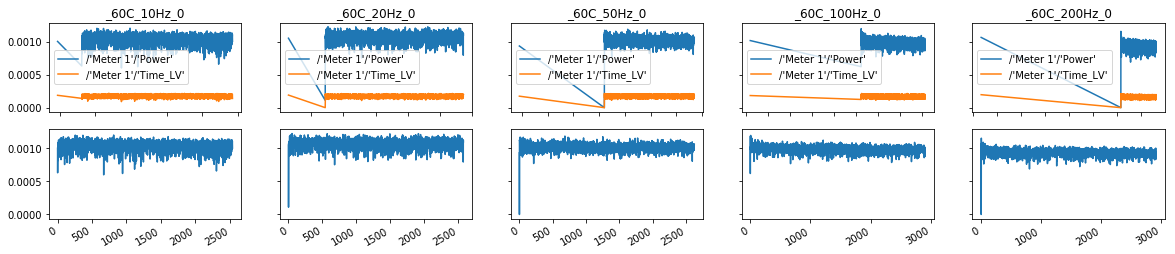

In [11]:

# fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

# i=0
# for filename in dfs_pow:
#     meter1 = dfs_pow[filename]['/\'Meter 1\'/\'Power\'']
#     meter2 = dfs_pow[filename]['/\'Meter 2\'/\'Power\'']
#     ratio = meter1/meter2
#     ax[i].plot(dfs_pow[filename]['/\'Meter 1\'/\'Time_LV\''],meter1)
#     ax[i].plot(dfs_pow[filename]['/\'Meter 2\'/\'Time_LV\''],meter2)
#     ax[i].set_title(filename)
#     ax[i].legend(dfs_pow[filename].columns)
#     ax[i].plot(meter1)
#     i=i+1
    
# fig.autofmt_xdate()